Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
img:  <class 'numpy.ndarray'> (3, 3, 3)


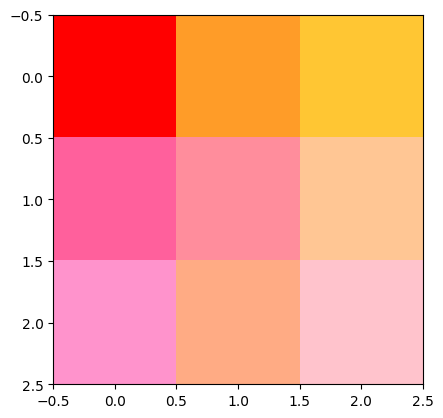

In [42]:
import numpy as np
import matplotlib.pyplot as plt


from pathlib import Path # ファイルシステム
from google.colab import drive # Google drive
drive.mount('/content/drive')
p = Path('/content/drive/My Drive/iicex/')  # 画像ファイルのフォルダ
#list( p.iterdir() )  # フォルダの内容をリストにする


from skimage import io #入出力ライブラリ読込
img = io.imread('/content/drive/My Drive/iicex/3x3.png')  # 画像ファイルの読み込み
#from PIL import Image #pillow読込
#PILimg = Image.open('/content/drive/My Drive/iicex/baboon.png')  # 画像ファイルの読み込み
#img = PILimg.convert('L') #グレイスケール変換
sampleimg = np.asarray(img) #numpy配列に変換
#print("PILimg: ", type(PILimg))
print("img: ", type(sampleimg), sampleimg.shape)

#plt.imshow(sampleimg, cmap='gray', vmin=0, vmax=255)
plt.imshow(sampleimg)

<function matplotlib.pyplot.show(close=None, block=None)>

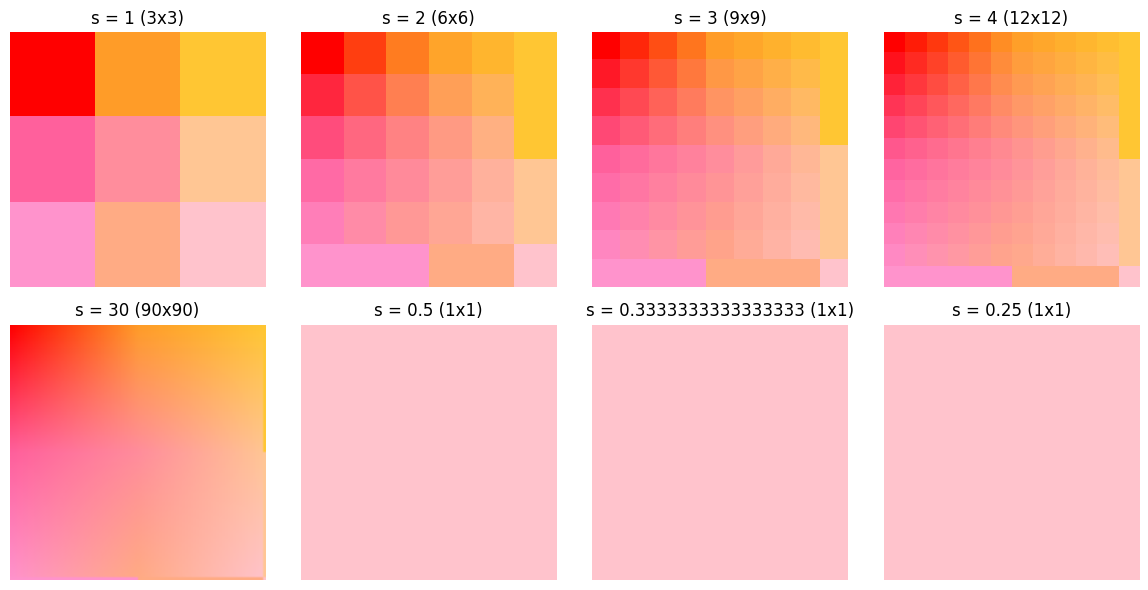

In [109]:
def linearinterpolate(x0, y0, x1, y1, x):
  return y0 * (x1 - x) + y1 * (x - x0) / (x1 - x0)

def bilinearinterpolate(x1, y1, x2, y2, z11, z21, z12, z22, x, y):
  z1121 = linearinterpolate(x1, z11, x2, z21, x)
  z1222 = linearinterpolate(x1, z12, x2, z22, x)
  return linearinterpolate(y1, z1121, y2, z1222, y)


#外枠をすべてゼロで追加する関数 3色ver
def sotowaku (img, num_insert): #Nは追加するピクセル数
  #枠追加処理(上下)
  bk1=np.full((num_insert,img.shape[1],3),255, np.uint8)
  array=np.insert(img, 0, bk1, axis=0)
  array=np.insert(array, array.shape[0], bk1, axis=0)
  #枠追加処理(左右)
  bk2=np.full((array.shape[0],num_insert,3),255, np.uint8)
  array=np.insert(array, [0], bk2, axis=1)
  array=np.insert(array, [array.shape[1]], bk2, axis=1)

  return array




def resize(sampleimg, s): #sは倍率

  #行数と列数
  samplerow = sampleimg.shape[0]
  samplecolumn = sampleimg.shape[1]
  #print("samplerow, samplecolumn", samplerow, samplecolumn)

  row = int(np.floor ( samplerow * s))
  if row == 0: row = 1
  column = int(np.floor ( samplecolumn * s))
  if column == 0: column = 1
  #print("row, column", row, column)

  #リサイズ後のインデックスを相対的にリサイズ前のインデックスに戻す
  soutaiteki_index_xs = np.linspace(0, samplerow-1, row)
  #print("soutaiteki_index_xs", soutaiteki_index_xs.shape)
  #print(soutaiteki_index_xs)
  soutaiteki_index_ys = np.linspace(0, samplecolumn-1, column)


  #線形補正するときのsampleimg左端インデックス
  satans = [int(np.floor(soutaiteki_index_xs[i])) for i in range(row)]
  #線形補正するときのsampleimg上端インデックス
  joutans = [int(np.floor(soutaiteki_index_ys[j])) for j in range(column)]

  Rimg = np.array([[[0, 0, 0] for j in range(column)] for i in range (row)])
  #print("Rimg", Rimg.shape)

  sotoimg = sotowaku(sampleimg, 2)
  #print("sotoimg", sotoimg.shape)

  for i in range(row):
    for j in range(column):
      for k in range(3):

        #線形補正するときのsampleimg左端インデックス
        satan = satans[i]
        #線形補正するときのsampleimg上端インデックス
        joutan = joutans[j]

        #print("i, j, k: ", i, j, k)
        #print(satan, joutan, satan+1, joutan+1, sampleimg[satan,joutan, k], sampleimg[satan + 1,joutan, k], sampleimg[satan,joutan + 1, k], sampleimg[satan + 1,joutan + 1, k], soutaiteki_index_xs[i], soutaiteki_index_xs[j])
        #print(sotoimg[satan, joutan, k])
        if i == row-1 and j == column-1:
          Rimg[i, j, k] = sampleimg[-1, -1, k]

        elif i != row-1 and j == column-1:
          Rimg[i, j, k] = sampleimg[satans[i], -1, k]

        elif i == row-1 and j != column-1:
          Rimg[i, j, k] = sampleimg[-1, joutans[j], k]

        else:
          Rimg[i, j, k] = bilinearinterpolate(satan, joutan, satan+1, joutan+1, sampleimg[satan,joutan, k], sampleimg[satan + 1,joutan, k], sampleimg[satan,joutan + 1, k], sampleimg[satan + 1,joutan + 1, k], soutaiteki_index_xs[i], soutaiteki_index_ys[j])




  return Rimg


fig, axes = plt.subplots(2, 4, figsize=(12,6), tight_layout=True, squeeze = False)
ss = [1, 2, 3, 4, 30, 1/2, 1/3, 1/4]

for row in axes:
  for one in row:
    one.axis("off") #軸を消す



for i in range(2):
  for j in range(4):
    #if (i == 1) and (j == 3):continue
    #fig.add_subplot()は必要なくなり、配列的に処理ができるようになる。
    resizedimg = resize( sampleimg, ss[4*i + j])
    axes[i][j].imshow(resizedimg)
    axes[i][j].set_title("s = "+ str(ss[4*i + j]) + f" ({resizedimg.shape[0]}x{resizedimg.shape[1]})")


plt.show

(60, 30, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

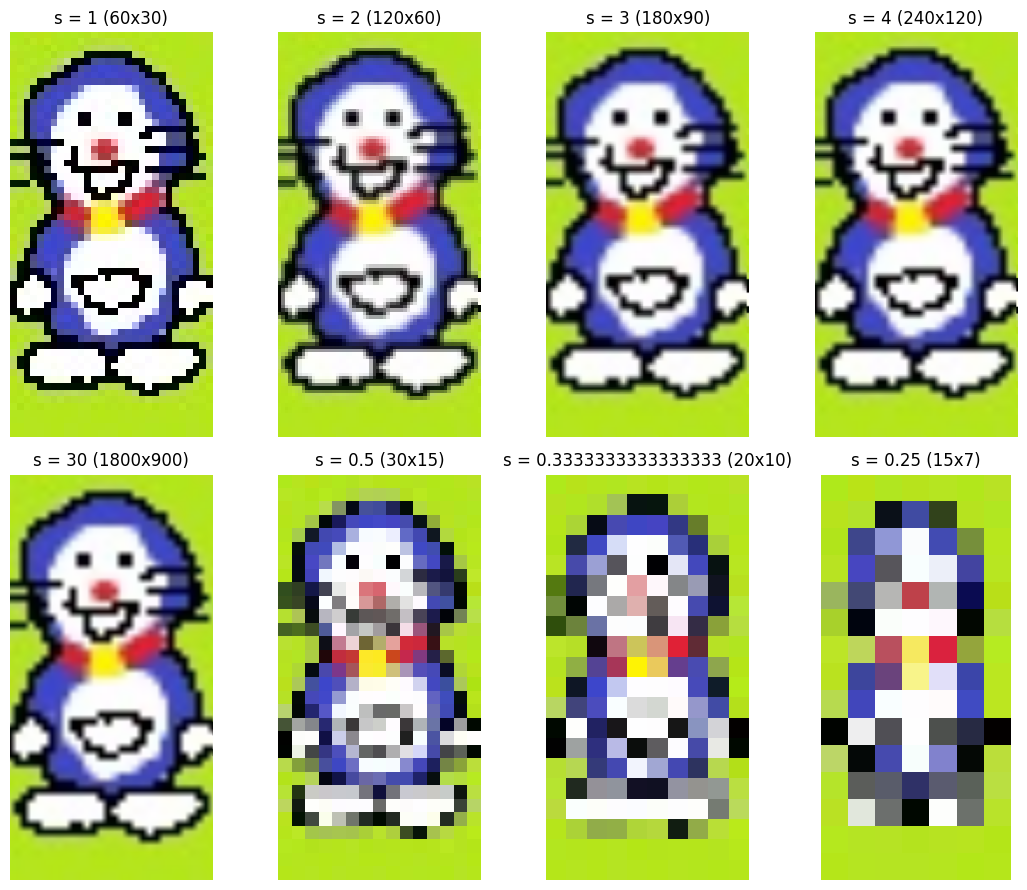

In [122]:
sampleimg2 = np.asarray(io.imread('/content/drive/My Drive/iicex/doraemon.jpg'))
#ペイントの機能でpngファイル作るとなぜか色の基底が4つになる。jpgならいける
print(sampleimg2.shape)
fig, axes = plt.subplots(2, 4, figsize=(12,9), tight_layout=True, squeeze = False)
ss = [1, 2, 3, 4, 30, 1/2, 1/3, 1/4]

for row in axes:
  for one in row:
    one.axis("off") #軸を消す



for i in range(2):
  for j in range(4):
    #if (i == 1) and (j == 3):continue
    #fig.add_subplot()は必要なくなり、配列的に処理ができるようになる。
    resizedimg = resize(sampleimg2, ss[4*i + j])
    axes[i][j].imshow(resizedimg)
    axes[i][j].set_title("s = "+ str(ss[4*i + j]) + f" ({resizedimg.shape[0]}x{resizedimg.shape[1]})")


plt.show